# The Sparks Foundation

# Data science and Business Analytics Internship
Supervised Machine Learning

-------------------------------------------------------------------------------------------------------------------------------

# Task 1: Predict the percentage of an student based on the no. of study hours

- Simple linear regression - using mathematic logic along with the Scikit learn library
- In this task I'll present the implementation of simple linear regression using amalgamation of core mathematical logic along with the inbuilt library Scikit learn

# Author : - Arpan Korat

-------------------------------------------------------------------------------------------------------------------------------

# Import essential libraries for the task
- Numpy to save the Hours and Score values in different arrays.
- Scikit to split the data into two sets : - 1). Training set, 2). Test set.
- Matplotlib to represent the train model in pictorial form.
- Pandas to manage the dataframes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split

Read the data from the given CSV file and store the data-frame into variable named "data".

In [3]:
data = pd.read_csv('http://bit.ly/w-data')

Print the data-frame

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

Above output (Out[5]) indicates two values.

First value represents number of records (rows).

Second value represents number of fields (columns).

# Data Visualization 

In [6]:
# Create numpy arrays for both of the fields (Columns - Hours, Scores) and store it variable named X and Y respectively.
X = data['Hours'].values
Y = data['Scores'].values

In [7]:
# See the type of both the variables
type(X)
type(Y)

numpy.ndarray

In [9]:
# See the values of the variables
print("Hours : - ", X)
print("Scores : - ", Y)

Hours : -  [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
Scores : -  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


-------------------------------------------------------------------------------------------------------------------------------

Plot the given data points into graph

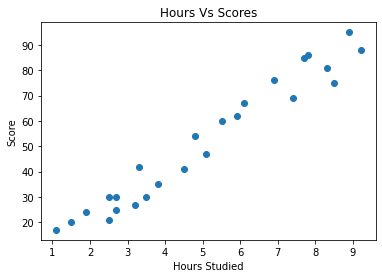

In [10]:
# Giving appropriate lables for axises and title for graph
pl.title("Hours Vs Scores")
pl.xlabel("Hours Studied")
pl.ylabel("Score")

# Plot the graph in data points
pl.scatter(X,Y)


-------------------------------------------------------------------------------------------------------------------------------

# Train the model

In [11]:
# Split the data into two parts. 
# First part for training data for train the model : - X_train, Y_train
# Second part for testing the trained model : - X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
# Displays the value of the training variables
print("Training values for Hours", X_train)
print("Training values for Scores", Y_train)

Training values for Hours [3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
 8.9 4.5]
Training values for Scores [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [13]:
# Displays the value of the testing variables
print("Testing values for Hours", X_test)
print("Testing values for Scores", Y_test)

Testing values for Hours [1.5 3.2 7.4 2.5 5.9]
Testing values for Scores [20 27 69 30 62]


-------------------------------------------------------------------------------------------------------------------------------

# Mathematical implementation of the algorithm starts from here.

In [15]:
# Getting the means for both training variables
xbar = np.mean(X_train)
ybar = np.mean(Y_train)

n = len(X_train)

#Numerator
sum_num = 0

#Denominator
sum_denom = 0

for i in range(n):
    sum_num += (X_train[i] - xbar) * (Y_train[i] - ybar)
    sum_denom += (X_train[i] - xbar)**2

    
# Find m = slop of regression line (y=mx+c)
m = sum_num/sum_denom


#Find coeff = constant in line equation, where coeff represents the y intersection of the regression line while x = 0.
coeff = ybar - (m*xbar)

# Print the values for slop(m) of regression line and Constant c : - y = mx + c.
print("Slop of the regression line = ", m)
print("Constant of the regression line = ", coeff)


Slop of the regression line =  9.910656480642235
Constant of the regression line =  2.0181600414346903


-------------------------------------------------------------------------------------------------------------------------------

# Test the learned model.

In [16]:
# Prediction of Y(Scores) for X_test points based on m and c values
# ypred is list for storing values of predictions 
ypred = []
for i in range(len(X_test)):
    ypred.append((m * X_test[i]) + coeff)
    
# Print the predicated values
print(ypred)

[16.884144762398044, 33.73226077948984, 75.35701799818722, 26.794801243040276, 60.49103327722388]


In [17]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': ypred}) 

# Here I'm printing table to visualize the difference between actual and prdicted values
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


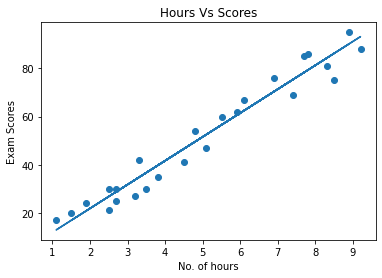

In [18]:
# Getting the all prediction points for Scores and store it into a variable named yall (list)
yall=[]
for i in range(len(X)):
    yall.append((m * X[i]) + coeff)
    
# Plot prediction points and regression line in a single graph
pl.scatter(X,Y)
pl.plot(X,yall)

pl.title("Hours Vs Scores")
pl.xlabel('No. of hours')
pl.ylabel('Exam Scores')

pl.show()

In [19]:
# Displaying the predicted score for nunumber of hours of study : - 9.25
print("Predicted Score", (m*9.25)+coeff)

Predicted Score 93.69173248737536


-------------------------------------------------------------------------------------------------------------------------------

# Calculate the R-squared error for the trained model

In [20]:
# Accuracy of the model can determine by this method as the value of the end value.
# If the value closer to 1 then model is accurate for most of the time.
enume=0
edenom = 0

for i in range(len(yall)):
    enume += (yall[i]-ybar)**2
    edenom += (Y[i]-ybar)**2

print(enume/edenom)

0.9780181683263788
